In [1]:
from sklearn.model_selection import KFold
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from joblib import Parallel,delayed
from celer import GroupLasso
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from joblib import Parallel,delayed

import pandas as pd
import warnings
import cvxpy as cp
from helpers import *
import random
warnings.filterwarnings('ignore')


df100 = pd.read_csv('empirical_data/X100_22.csv')
dff100 = df100[df100.columns[1:]]


fama285_ = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/Fama285_22.csv')
fama285 = fama285_[fama285_.columns[1:]]

Z = dff100.values
# df22 = pd.read_csv('/home/guonaixin/trylab/X_full_22.csv')
# df96 = pd.read_csv('/home/guonaixin/trylab/X_full.csv')
# df22['Unnamed: 0'] = df96['Unnamed: 0']
# dff22 = df22[df22.columns[1:]]
# dff96 = df96[df96.columns[1:]]
# fama285_ = pd.read_csv('/home/guonaixin/trylab/Fama285.csv')
# fama285_['Unnamed: 0'] = df96['Unnamed: 0']
# fama285 = fama285_[fama285_.columns[1:]]

# finally_choose = []             
# chosen_set =[]
     
# chosen_set =[] 


In [4]:
plist = [25, 35, 45, 55, 65, 75, 105]
n = 300
knum = 5


N_simulations = 100
true_set = [0,1,2,3,4]
rho = 1
sig =0.3
Chosen_svd_set_5 =[]

def Final(i,p):
   Unionset = []
   np.random.seed(i)
   random.seed(i)
#    df = pd.read_csv('/home/guonaixin/trylab/factor-ident/simu_matrix/100_'+str(p)+'_5Xfull'+str(i+1)+'.csv')
#    df =df.drop('Unnamed: 0',axis=1)
#    Z = np.array(df,dtype = 'float64')
   Z = create_Z(n, knum, p, rho, sig)
   unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = compute_svd_C(Z,knum), asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
#    unionset = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
   return  unionset
Select_knum = []
CPlist=[]
CFlist=[]
TRlist=[]
FRlist=[]
F1list = [] 
for p in plist:
    N_chosen_set= Parallel(n_jobs=50)(delayed(Final)(i,p) for i in range(N_simulations))

    num_chosen_set=[]
    Final_knum=[]
    for unionset in N_chosen_set:
        num_chosen_set.append(unionset[0]) 
        Final_knum.append(len(unionset[0]))
        
    result=evaluate(num_chosen_set,N_simulations,knum,p) #3/5
    print(result)
    Select_knum.append(result[0]) 
    CPlist.append(result[1])
    CFlist.append(result[2])
    TRlist.append(result[3])
    FRlist.append(result[4])
    F1list.append(result[5])
    
fig = plt.figure(figsize =(4, 3))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
x = plist
plt.grid(linestyle="--", alpha=0.3)
plt.title('n = 300, k = 5')
plt.xlabel('number of candidate factors '+ '$ p$')
plt.ylabel('rate')  # y轴标题
plt.plot(x, np.array(CPlist), marker='o', markersize=3)  
plt.plot(x, np.array(CFlist), marker='o', markersize=3)
plt.plot(x, np.array(TRlist), marker='o', markersize=3)
plt.plot(x, np.array(FRlist), marker='o', markersize=3)


plt.legend(['CP', 'CF', 'TPR', 'FPR'],prop = {'size':8})  

plt.show()  # 显示折线图
fig.savefig('simu_result/plot_300_5_dgl_sim.pdf',dpi=600,format='pdf',bbox_inches="tight")



Counter({4: 88, 3: 88, 2: 85, 1: 83, 0: 82, 18: 9, 8: 6, 9: 5, 12: 4, 24: 4, 7: 4, 20: 4, 5: 4, 11: 4, 22: 3, 21: 3, 23: 3, 14: 3, 6: 3, 13: 3, 19: 3, 17: 3, 10: 2, 15: 2, 16: 2})
selected factor size: 5.0 CP: 0.3 CF: 0.3 TR: 0.852 FR: 0.037 F1: 0.852
(5.0, 0.3, 0.3, 0.852, 0.037, 0.852)
Counter({2: 98, 1: 98, 4: 97, 0: 96, 3: 95, 31: 2, 32: 2, 12: 2, 6: 1, 33: 1, 19: 1, 24: 1, 15: 1, 22: 1, 17: 1, 7: 1, 8: 1, 13: 1})
selected factor size: 5.0 CP: 0.84 CF: 0.84 TR: 0.968 FR: 0.005333 F1: 0.968
(5.0, 0.84, 0.84, 0.968, 0.005333, 0.968)
Counter({1: 100, 2: 99, 4: 99, 0: 99, 3: 99, 16: 1, 36: 1, 24: 1, 7: 1})
selected factor size: 5.0 CP: 0.96 CF: 0.96 TR: 0.992 FR: 0.001 F1: 0.992
(5.0, 0.96, 0.96, 0.992, 0.001, 0.992)
Counter({2: 100, 4: 100, 1: 100, 3: 100, 0: 99, 17: 1})
selected factor size: 5.0 CP: 0.99 CF: 0.99 TR: 0.998 FR: 0.0002 F1: 0.998
(5.0, 0.99, 0.99, 0.998, 0.0002, 0.998)
Counter({4: 100, 1: 100, 3: 100, 0: 100, 2: 99, 26: 1})
selected factor size: 5.0 CP: 0.99 CF: 0.99 TR

In [1]:
from sklearn.model_selection import KFold
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from joblib import Parallel,delayed
from celer import GroupLasso
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from joblib import Parallel,delayed

import pandas as pd
import warnings
import cvxpy as cp
from helpers import *
import random
warnings.filterwarnings('ignore')

fama285_ = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/Fama285_22.csv')
fama285 = fama285_[fama285_.columns[1:]]
df99 = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/X99_22.csv')
dff99 = df99[df99.columns[1:]]
df22 = pd.read_csv('/home/guonaixin/trylab/factor-ident/empirical_data/X22_22.csv')
dff22 = df22[df22.columns[1:]]
df99['Unnamed: 0'] = fama285_['Date']
df22['Unnamed: 0'] = fama285_['Date']

In [ ]:
round(np.mean(dff99)*100/np.std(dff99) * np.sqrt(12),2)[50:]

In [ ]:
round(np.mean(dff99)*100/np.std(dff99) * np.sqrt(12),2)[:50]

In [10]:
finally_choose = []
knum = 7
for year_i in range(1,21):
    dfff = dff99[year_i*12:year_i*12+359]
    Z = np.float64(dfff)
    chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
    finally_choose.append([df99['Unnamed: 0'][year_i*12],dff99.columns[chosen_set]])

In [3]:
finally_choose[0]

[197301,
 Index(['CP', 'QMJ', 'SMB', 'ROE', 'CMA', 'RMW', 'MKTRF'], dtype='object')]

In [13]:
       
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
rresult = []
Result = []
for i in range(len(finally_choose)):
    Result.append(list(finally_choose[i][1]))
# Result=finally_choose
for result in Result:
    rresult+=list(result)
rresult = Counter(rresult)
freqindex= sorted(rresult.items(), key=lambda x: x[1], reverse=True)

df_plot = pd.DataFrame()
for i in range(len(Result)):
    for j in range(len(Result[i])):
        if Result[i][j] not in df_plot.columns:
            df_plot[Result[i][j]] = pd.Series([np.nan]*len(Result))
        df_plot[Result[i][j]][i] = Result[i][j]

df_plot = df_plot.applymap(lambda x: 1 if pd.notnull(x) else x)
df_plot = df_plot.fillna(0)

# df_plot = pd.DataFrame(Result).T
df_plot = df_plot.T
df =  df99
df_plot.columns = [str(df99['Unnamed: 0'][k*12+359])[:4] for k in range(1,1+df_plot.shape[1])]
df_plot['temp_sum'] = df_plot.sum(axis=1)
# df_plot['factors'] = [f'factor_{k}' for k in range(df_plot.shape[0])]
# df_plot['factors'] = [freqindex[k][0] for k in range(df_plot.shape[0])]
df_plot['factors'] = [freqindex[k][0] for k in range(df_plot.shape[0])]
df_plot = df_plot.sort_values(by=['temp_sum'], ascending=False)
df_plot = df_plot.drop(['temp_sum'], axis=1)
df_plot = df_plot.set_index('factors')


<Figure size 300x100 with 0 Axes>

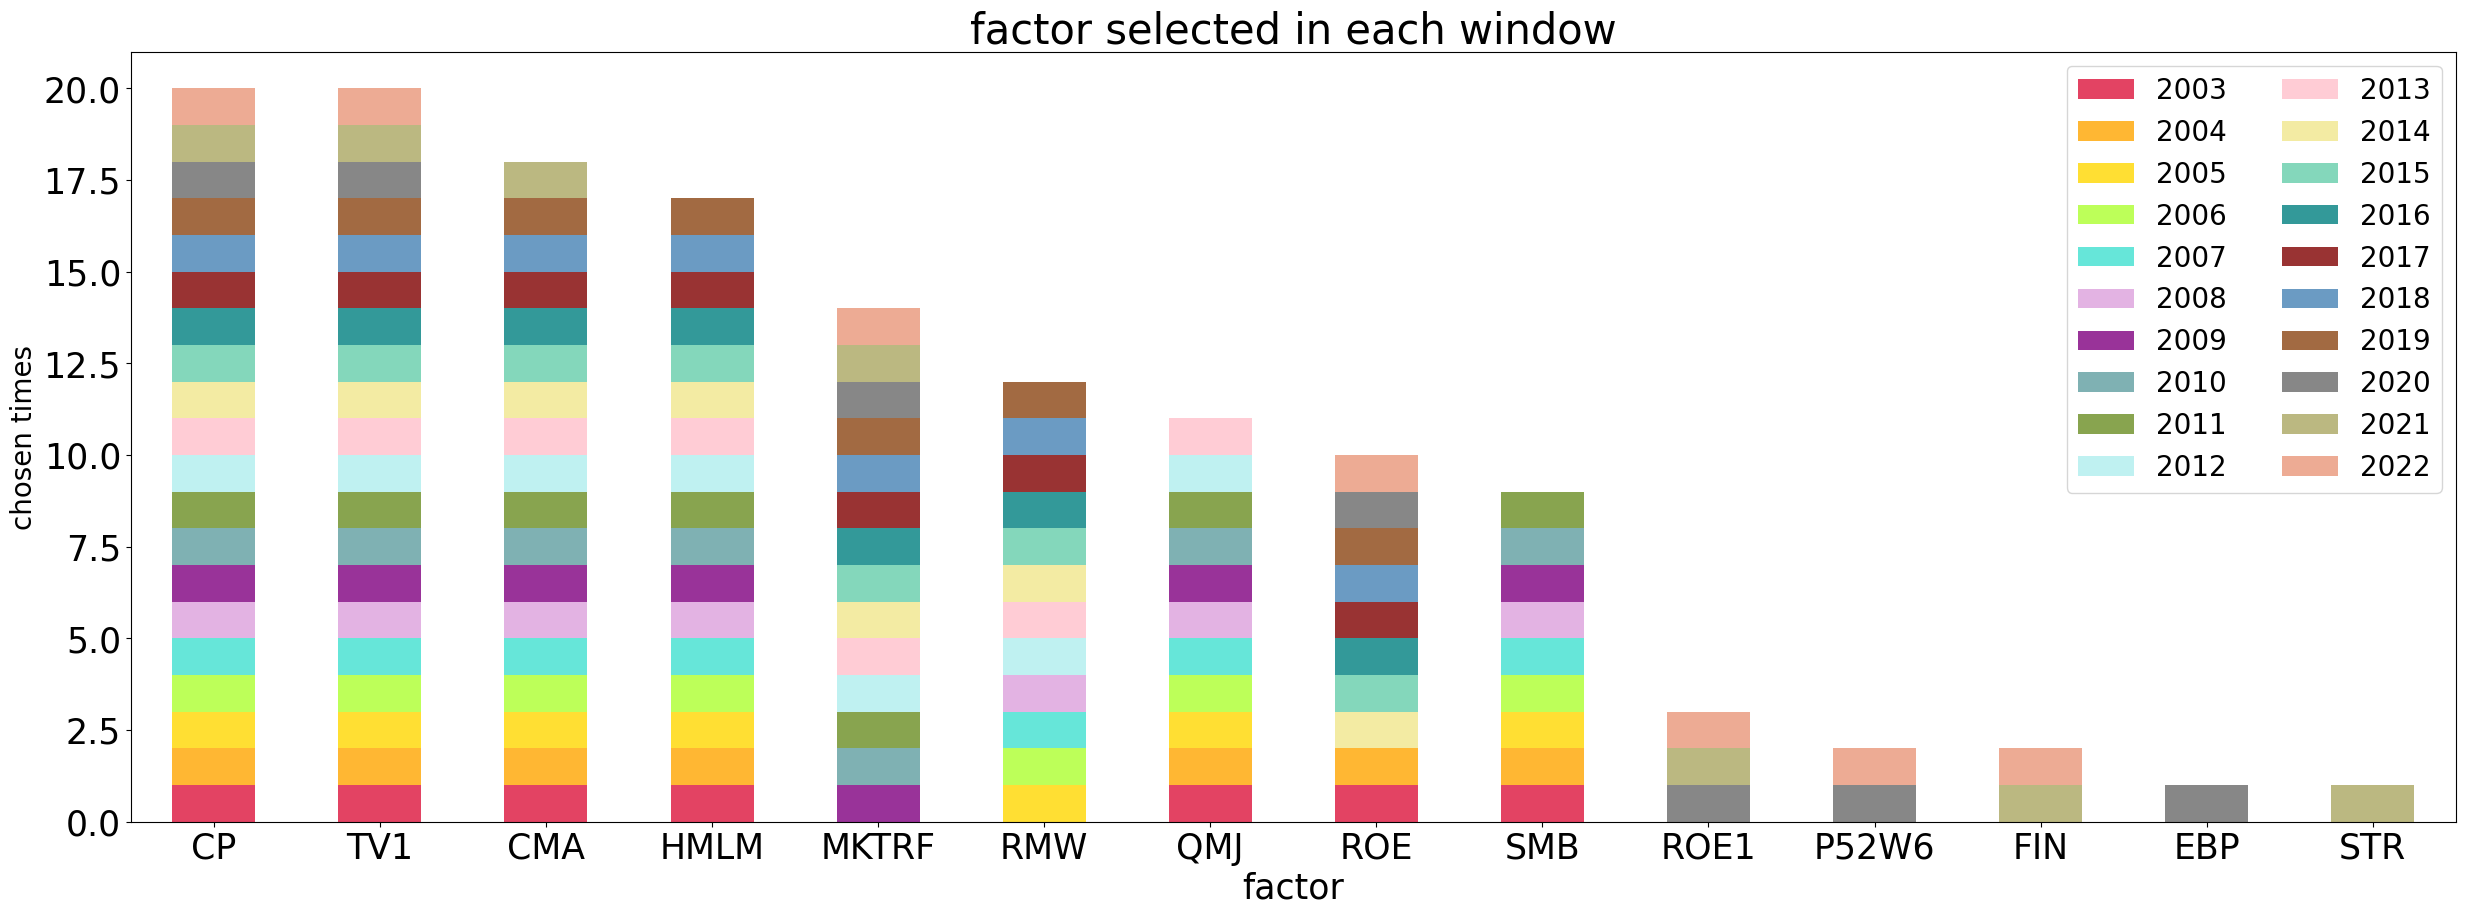

In [14]:

fig = plt.figure(figsize =(3, 1))
plt.rcParams['figure.figsize'] = (30.0, 10.0)
plt.rcParams['axes.unicode_minus']=False
# sns.set_palette(sns.color_palette('bright', n_colors = 30))

# colors = ["gold", "paleturquoise", "orange", 
#           "lightcoral", "mediumorchid", "crimson", "cadetblue", 
#           "olivedrab", "deepskyblue", "greenyellow", "lightcoral", "chocolate", 
#           "darkgreen", "yellow", "dimgray", "darkblue", "pink", 
#           "bright blue", "burnt orange", "salmon", 
#           "forest green", "khaki", "aqua", "maroon", "navy", "hot pink", 
#           "greyish blue", "seafoam"]
colors = ["#DC143C", "#FFA500","#FFD700", "#ADFF2F", "#40E0D0", 
          "#DDA0DD","#800080","#5F9EA0", "#6B8E23", "#AFEEEE",
           "#FFC0CB", "#F0E68C", "#66CDAA","#008080","#800000",
          "#4682B4",  "#8B4513","#696969", "#aaa662", "#E9967A"]
sns.set_palette(sns.color_palette(colors))
# sns.set_palette(sns.xkcd_palette(colors))

df_plot.plot.bar(stacked=True, alpha=0.8, )
plt.xticks(rotation=360, fontsize=25)

plt.yticks(fontsize=25)
plt.xlabel('factor', fontsize=25)
plt.ylabel('chosen times', fontsize=20)   
plt.legend(fontsize=20, loc="upper right",ncol=2)
plt.title('factor selected in each window', fontsize=30)
# plt.ticklabel_format(axis="y", style="plain")
# plt.yticks(np.arange(0, 251, 50))
# plt.savefig('summary_stats/figure_1.png', dpi=100)
fig = plt.gcf()
plt.show()
# plt.close()
fig.savefig('window22_5.pdf',dpi=600,format='pdf',bbox_inches="tight")


In [38]:
       
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
rresult = []
for i in range(len(finally_choose)):
    finally_choose[i]=list(finally_choose[i][1][0])
Result=finally_choose
for result in Result:
    rresult+=list(result)
rresult = Counter(rresult)
freqindex= sorted(rresult.items(), key=lambda x: x[1], reverse=True)

df_plot = pd.DataFrame()
for i in range(len(Result)):
    for j in range(len(Result[i])):
        if Result[i][j] not in df_plot.columns:
            df_plot[Result[i][j]] = pd.Series([np.nan]*len(Result))
        df_plot[Result[i][j]][i] = Result[i][j]

df_plot = df_plot.applymap(lambda x: 1 if pd.notnull(x) else x)
df_plot = df_plot.fillna(0)

# df_plot = pd.DataFrame(Result).T
df_plot = df_plot.T
df =  pd.read_csv('/home/guonaixin/trylab/X_full.csv')
df_plot.columns = [str(df22['Unnamed: 0'][k*12+359])[:4] for k in range(df_plot.shape[1])]
df_plot['temp_sum'] = df_plot.sum(axis=1)
# df_plot['factors'] = [f'factor_{k}' for k in range(df_plot.shape[0])]
# df_plot['factors'] = [freqindex[k][0] for k in range(df_plot.shape[0])]
df_plot['factors'] = [freqindex[k][0] for k in range(df_plot.shape[0])]
df_plot = df_plot.sort_values(by=['temp_sum'], ascending=False)
df_plot = df_plot.drop(['temp_sum'], axis=1)
df_plot = df_plot.set_index('factors')


<Figure size 300x100 with 0 Axes>

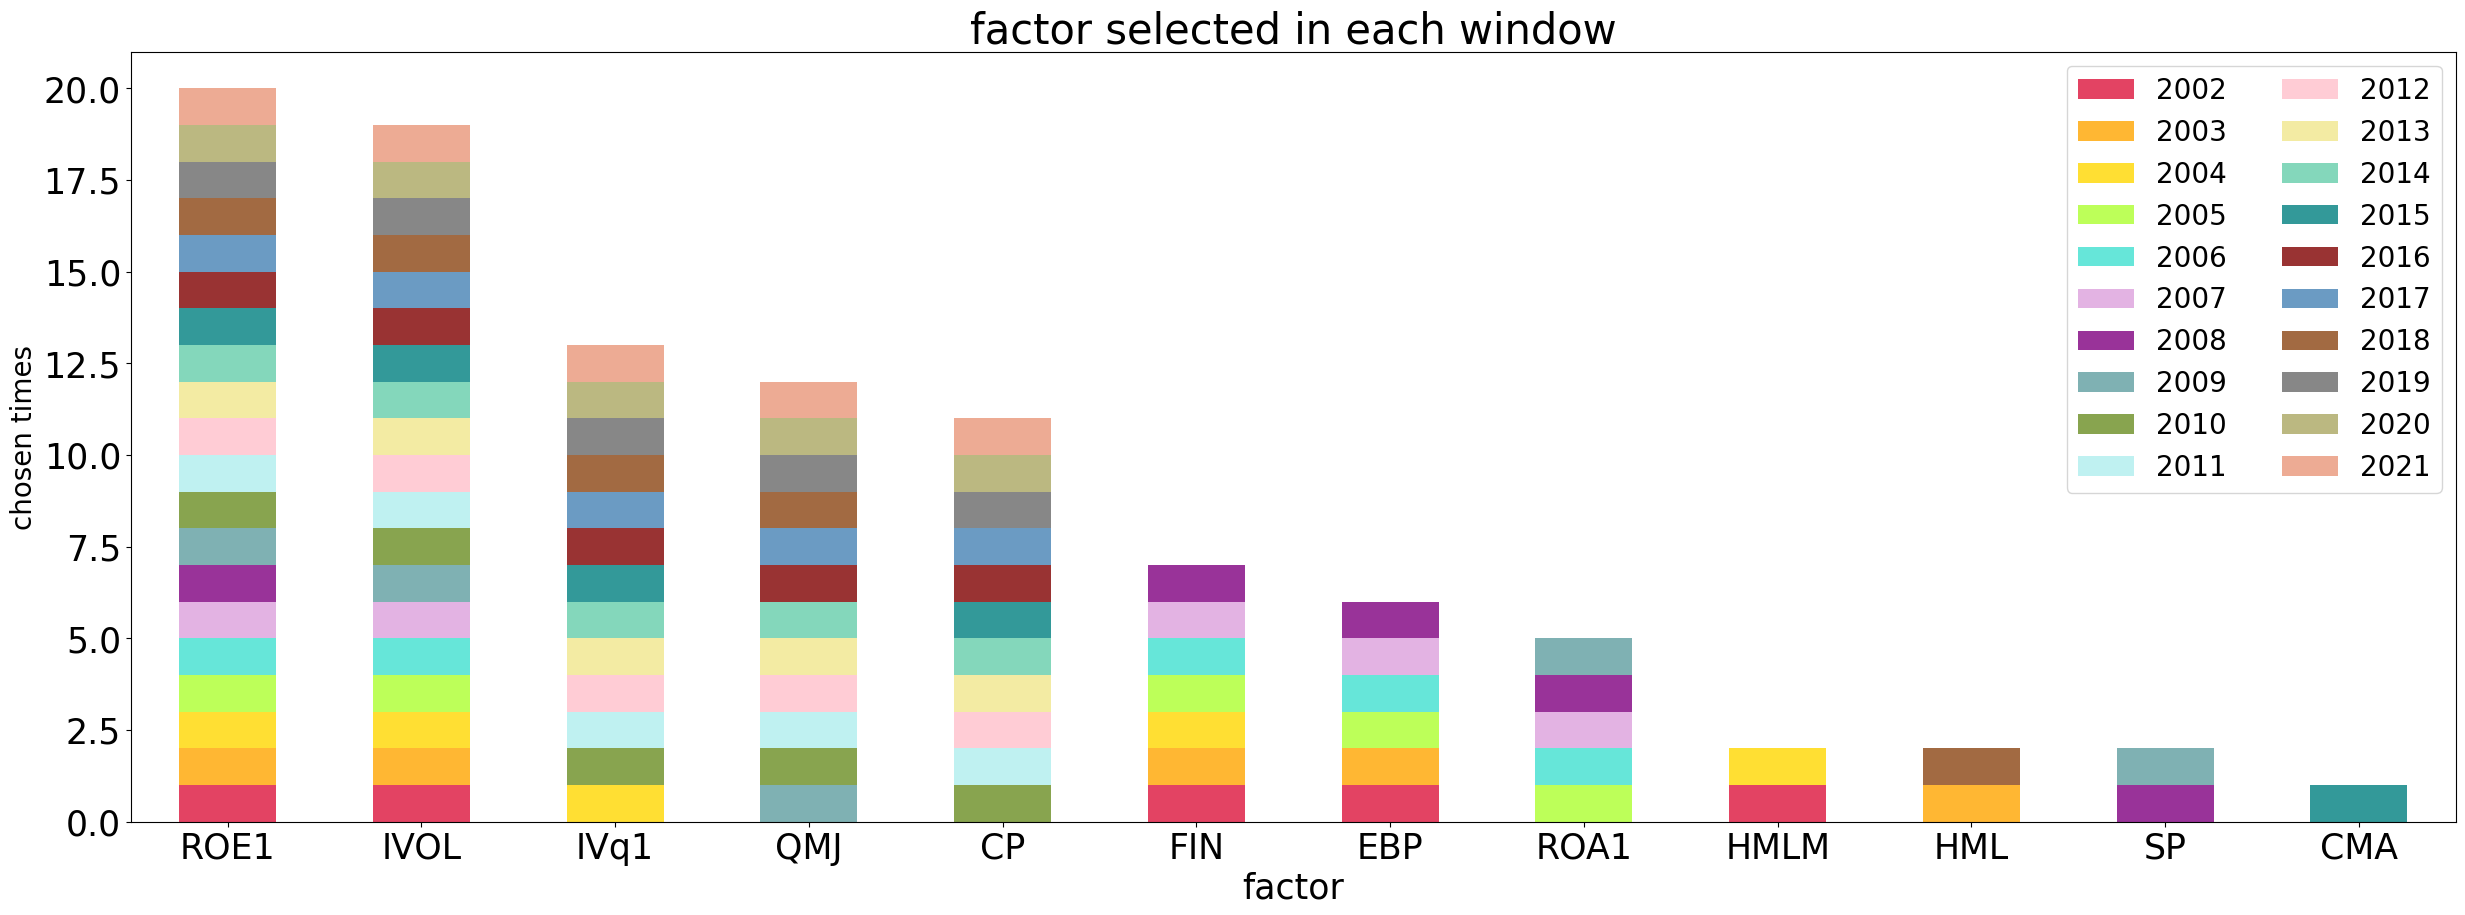

In [39]:

fig = plt.figure(figsize =(3, 1))
plt.rcParams['figure.figsize'] = (30.0, 10.0)
plt.rcParams['axes.unicode_minus']=False
# sns.set_palette(sns.color_palette('bright', n_colors = 30))

# colors = ["gold", "paleturquoise", "orange", 
#           "lightcoral", "mediumorchid", "crimson", "cadetblue", 
#           "olivedrab", "deepskyblue", "greenyellow", "lightcoral", "chocolate", 
#           "darkgreen", "yellow", "dimgray", "darkblue", "pink", 
#           "bright blue", "burnt orange", "salmon", 
#           "forest green", "khaki", "aqua", "maroon", "navy", "hot pink", 
#           "greyish blue", "seafoam"]
colors = ["#DC143C", "#FFA500","#FFD700", "#ADFF2F", "#40E0D0", 
          "#DDA0DD","#800080","#5F9EA0", "#6B8E23", "#AFEEEE",
           "#FFC0CB", "#F0E68C", "#66CDAA","#008080","#800000",
          "#4682B4",  "#8B4513","#696969", "#aaa662", "#E9967A"]
sns.set_palette(sns.color_palette(colors))
# sns.set_palette(sns.xkcd_palette(colors))

df_plot.plot.bar(stacked=True, alpha=0.8, )
plt.xticks(rotation=360, fontsize=25)

plt.yticks(fontsize=25)
plt.xlabel('factor', fontsize=25)
plt.ylabel('chosen times', fontsize=20)   
plt.legend(fontsize=20, loc="upper right",ncol=2)
plt.title('factor selected in each window', fontsize=30)
# plt.ticklabel_format(axis="y", style="plain")
# plt.yticks(np.arange(0, 251, 50))
# plt.savefig('summary_stats/figure_1.png', dpi=100)
fig = plt.gcf()
plt.show()
# plt.close()
fig.savefig('window96_5.pdf',dpi=600,format='pdf',bbox_inches="tight")


# EXPLAIN OTHERS

In [5]:

knum=5

chosen_set = choose_factor('DGL', Z, knum, train_size=600, svd_C =10, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0]
print(list(dff100.columns[chosen_set]))

['CMA', 'COP', 'CP', 'FIN', 'dNCO', 'HMLM', 'MKTRF']


In [7]:

knum=8

chosen_set = choose_factor('DGL', Z[:12*36], knum, train_size=600, svd_C =10, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0]
print(list(dff100.columns[chosen_set]))

['CP', 'COP', 'CMA', 'ROE1', 'FIN', 'MKTRF', 'QMJ', 'UMD']


In [6]:

knum=5

chosen_set = choose_factor('DGL', Z[:12*36], knum, train_size=600, svd_C =10, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0]
print(list(dff100.columns[chosen_set]))

['CP', 'COP', 'MKTRF', 'CMA', 'ROE1', 'FIN', 'UMD']


In [61]:

from helpers import *
chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C =5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.000002)
print(list(dff100.columns[chosen_set]))

['CMA', 'QMJ', 'ROE', 'RMW', 'SMB', 'HML', 'REG', 'MKTRF', 'PEAD']


In [43]:
for knum in range(1,15):
    U = np.linalg.svd(Z)[0][:,:knum]
    # U = np.linalg.svd(np.hstack((Z,fama285)))[0][:,:knum]
    chosen_set =[]
    l2_distance = np.zeros(Z.shape[0])
    Bhat = np.linalg.lstsq(U[:,:knum],Z, rcond=None)[0]
    Mhat = U[:,:knum]@Bhat
    l2_distance = np.linalg.norm(Mhat-Z,axis = 0)

    chosen_num = heapq.nsmallest(100,l2_distance)
    for t in chosen_num:
        index = list(l2_distance).index(t)
        chosen_set.append(index)
        l2_distance[index]= -1
    print(knum,list(dff100.columns[chosen_set])[:15])

1 ['QMJ', 'REG', 'IA', 'CMA', 'RMW', 'PEAD', 'ROE', 'SMB', 'ISq1', 'ISFF1', 'FIN', 'NI', 'NXF', 'dFNL', 'CEI']
2 ['CMA', 'QMJ', 'IA', 'HML', 'REG', 'ROE', 'RMW', 'PEAD', 'FIN', 'LTR', 'HMLM', 'NEI1', 'SMB', 'EBP', 'CP']
3 ['CMA', 'IA', 'QMJ', 'HML', 'REG', 'PEAD', 'ROE', 'RMW', 'HMLM', 'FIN', 'SMB', 'LTR', 'NEI1', 'EBP', 'BM']
4 ['CMA', 'QMJ', 'IA', 'RMW', 'ROE', 'HML', 'REG', 'PEAD', 'HMLM', 'FIN', 'SMB', 'NEI1', 'LTR', 'CP', 'MKTRF']
5 ['CMA', 'QMJ', 'IA', 'ROE', 'RMW', 'HML', 'SMB', 'REG', 'PEAD', 'HMLM', 'FIN', 'DTV12', 'NEI1', 'LTR', 'MKTRF']
6 ['CMA', 'IA', 'ROE', 'QMJ', 'RMW', 'HML', 'SMB', 'REG', 'PEAD', 'HMLM', 'FIN', 'CP', 'LTR', 'DTV12', 'NEI1']
7 ['CMA', 'QMJ', 'IA', 'RMW', 'ROE', 'SMB', 'HML', 'REG', 'PEAD', 'HMLM', 'MKTRF', 'FIN', 'DTV12', 'CP', 'LTR']
8 ['CMA', 'QMJ', 'IA', 'RMW', 'ROE', 'SMB', 'REG', 'HML', 'PEAD', 'HMLM', 'CP', 'MKTRF', 'FIN', 'DTV12', 'COP']
9 ['CMA', 'IA', 'QMJ', 'ROE', 'RMW', 'SMB', 'REG', 'HML', 'MKTRF', 'PEAD', 'HMLM', 'CP', 'IVOL', 'CLA', 'FIN']


In [41]:
chosen_set=[]
chosen_num = heapq.nsmallest(100,np.linalg.norm(Z,axis = 0))
for t in chosen_num:
    index = list(np.linalg.norm(Z,axis = 0)).index(t)
    chosen_set.append(index)
    np.linalg.norm(Z,axis = 0)[index]= -1
print(knum,list(dff100.columns[chosen_set])[:15])

14 ['PEAD', 'CMA', 'IA', 'REG', 'RMW', 'QMJ', 'ISFF1', 'ISq1', 'ROE', 'ETR', 'LTR', 'dFNL', 'NDF', 'dFIN', 'dII']


In [17]:

knum=6

chosen_set = choose_factor('TSMS', Z[:36*12], knum, train_size=600, svd_C =5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.00344)
print(list(dff100.columns[chosen_set]))

['QMJ', 'RMW', 'CMA', 'ROE', 'SMB', 'HML', 'REG', 'NEI1', 'MKTRF', 'dNCO', 'HMLM', 'PEAD']


In [4]:

knum=7

chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C =0.5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff100.columns[chosen_set]))


['CP', 'MKTRF', 'ROE', 'dNCO', 'SMB', 'RMW', 'CMA', 'HMLM']


In [8]:

knum=8

chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C =1, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff100.columns[chosen_set]))

['CP', 'MKTRF', 'ROE', 'dNCO', 'SMB', 'RMW', 'HMLM', 'CMA']


In [15]:

knum=6

chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C =1, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff100.columns[chosen_set]))

['MKTRF', 'CP', 'ROE', 'RMW', 'SMB', 'CMA']


In [17]:

knum=6
chosen_set = choose_factor('SGL', Z[:36*12], knum, train_size=600, svd_C =1, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff100.columns[chosen_set]))

['MKTRF', 'SMB', 'CP', 'ROE', 'RMW', 'OCA']


['HML', 'HMLM', 'UMD', 'REG', 'SMB', 'STR', 'QMJ', 'PEAD']

In [ ]:
Z=dff100.values
list(dff100.columns[sr_best(Z,lambda_val = 0.05, sigma = 500, T = 10000)])

sr_best 0.527630221698155


['ILR1', 'HMLM', 'STR', 'REG', 'IVOL', 'PEAD']

['ILR1', 'ME', 'OPE', 'HMLM', 'QMJ', 'STR', 'REG', 'IVOL', 'PEAD']    9   0.6428852356823308
['ILR1', 'SMB', 'HMLM', 'QMJ', 'STR', 'REG', 'IVOL', 'PEAD']          8   0.61,
['ILR1', 'SMB', 'HMLM', 'STR', 'REG', 'IVOL', 'PEAD']                 7   0.58
['ILR1', 'HMLM', 'STR', 'REG', 'IVOL', 'PEAD']                        6   0.52
<!-- ['SMB', 'HMLM', 'REG', 'IVOL', 'PEAD']                                5   0.062 -->


In [3]:

knum=6
dfff = dff99
Z = np.float64(dfff)

chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.000001)
print(list(dff99.columns[chosen_set]))

n,p=Z.shape
U = get_U(Z, knum)
chosen_set =[]
l2_distance = np.zeros(p)
Bhat = np.linalg.lstsq(U[:,:knum],Z, rcond=None)[0]
Mhat = U[:,:knum]@Bhat
l2_distance = np.linalg.norm(Mhat-Z,axis = 0)
chosen_num = heapq.nsmallest(knum,l2_distance)          
for t in chosen_num:
    index = list(l2_distance).index(t)
    chosen_set.append(index)
    l2_distance[index]= -1 
print(list(dff99.columns[chosen_set]))
mu = np.mean(Z, axis=0)
Sigma = np.cov(Z.T)
wt = np.linalg.solve(Sigma[chosen_set][:, chosen_set], mu[chosen_set])
print('sr',sr(wt, mu[chosen_set], Sigma[chosen_set][:, chosen_set]))

['CMA', 'QMJ', 'RMW']
['CMA', 'IA', 'RMW', 'ROE', 'QMJ', 'HML']
sr 0.0743368489396819


In [15]:
knum=5
dfff = dff99
Z = np.float64(dfff)
chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
print(list(dff99.columns[chosen_set]))
mu = np.mean(Z, axis=0)
Sigma = np.cov(Z.T)
wt = np.linalg.solve(Sigma[chosen_set][:, chosen_set], mu[chosen_set])
print('sr',sr(wt, mu[chosen_set], Sigma[chosen_set][:, chosen_set]))

['IVOL', 'EBP', 'HMLM', 'CMA', 'ROE']
sr 0.1030643734614219


In [11]:

knum=5
dfff = dff99
Z = np.float64(dfff)
chosen_set,nonzero = choose_factor('DGL', Z, knum, train_size=600, svd_C =0.7, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)
print(list(dff99.columns[chosen_set]),nonzero)
mu = np.mean(Z, axis=0)
Sigma = np.cov(Z.T)
wt = np.linalg.solve(Sigma[chosen_set][:, chosen_set], mu[chosen_set])
print('sr',sr(wt, mu[chosen_set], Sigma[chosen_set][:, chosen_set]))

['IVOL', 'FIN', 'EBP', 'CMA', 'HML'] 5
sr 0.0459122220747156


In [5]:

knum=6

chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C =0.5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff100.columns[chosen_set]))

['CP', 'ROE', 'MKTRF', 'HMLM', 'RMW', 'CMA']


In [22]:

knum=6

chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C =5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.000004)
print(list(dff100.columns[chosen_set]))

['CMA', 'QMJ', 'ROE', 'RMW', 'SMB', 'HML', 'REG', 'MKTRF', 'PEAD']


In [ ]:
np.array(dff100.columns)[np.argsort(1/alpha_z_score)]

In [37]:
Z=Z[:36*12]
Znorm = normalize_columns(Z)
chosen_set = sr_best(Znorm,lambda_val = 0.075, sigma = 500, T = 10000)
print(list(dff100.columns[chosen_set]))
mu = np.mean(Z, axis=0)
Sigma = np.cov(Z.T)
wt = np.linalg.solve(Sigma[chosen_set][:, chosen_set], mu[chosen_set])
print('sr',sr(wt, mu[chosen_set], Sigma[chosen_set][:, chosen_set]))

sr_best 0.7888750152629006
['ILR1', 'STR', 'REG', 'IVOL', 'PEAD']
sr 0.7888750152629014


In [ ]:
Znorm = normalize_columns(Z)
chosen_set = sr_best(Znorm,lambda_val = 0.055, sigma = 500, T = 10000)
print(list(dff100.columns[chosen_set]))
mu = np.mean(Z, axis=0)
Sigma = np.cov(Z.T)
wt = np.linalg.solve(Sigma[chosen_set][:, chosen_set], mu[chosen_set])
print('sr',sr(wt, mu[chosen_set], Sigma[chosen_set][:, chosen_set]))

In [43]:
set = np.array(['ILR1', 'SMB', 'CMA', 'STR', 'REG', 'IVOL'])
chosen_set =[]
for i in set:
    chosen_set.append(list(dff99.columns).index(i))
print(chosen_set)
mu = np.mean(Z, axis=0)
Sigma = np.cov(Z.T)
wt = np.linalg.solve(Sigma[chosen_set][:, chosen_set], mu[chosen_set])
print('sr',sr(wt, mu[chosen_set], Sigma[chosen_set][:, chosen_set]))

[38, 78, 81, 87, 89, 90]
sr 0.46920507593787697


# r2

In [17]:
chosen_set = []
# print(df['Unnamed: 0'][year_i*12])
dfff = dff99[:37*12]
knum=6
Z = np.float64(dfff)
chosen_set = choose_factor('SGL', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff96.columns[chosen_set]))

[8, 77, 78, 93, 84, 80, 81] check_press1  0.5865354935399992 [8, 93, 46, 80, 78, 77] check_press2 0.6205049450965007
knum 7 [8, 77, 78, 93, 84, 80, 81]
[8, 77, 84, 46, 93, 78, 80, 19] check_press1  0.5695823176378378 [8, 77, 78, 93, 84, 80, 81] check_press2 0.5842009259474265
knum 8 [8, 77, 84, 46, 93, 78, 80, 19]
[8, 77, 93, 78, 80, 19, 84, 13, 87] check_press1  0.5537888152594844 [8, 77, 84, 46, 93, 78, 80, 19] check_press2 0.5629268734691454
knum 9 [8, 77, 93, 78, 80, 19, 84, 13, 87]
[8, 77, 93, 19, 78, 80, 84, 87, 2, 13] check_press1  0.540993964052219 [8, 77, 93, 78, 80, 19, 84, 13, 87] check_press2 0.5503733856931241
knum 10 [8, 77, 93, 19, 78, 80, 84, 87, 2, 13]
[8, 77, 78, 80, 93, 19, 13, 69, 84, 46, 87] check_press1  0.5389785426068919 [8, 77, 93, 19, 78, 80, 84, 87, 2, 13] check_press2 0.5489519980474443
knum 11 [8, 77, 78, 80, 93, 19, 13, 69, 84, 46, 87]
[77, 8, 78, 80, 19, 83, 69, 13, 61, 82, 53, 54] check_press1  0.5166441424350047 [8, 77, 78, 80, 93, 19, 13, 69, 84, 46, 8

In [ ]:
chosen_set = []
# print(df['Unnamed: 0'][year_i*12])
dfff = dff99[:37*12]
knum=6
Z = np.float64(dfff)
chosen_set = choose_factor('DGL', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff96.columns[chosen_set]))

In [25]:
chosen_set = []
# print(df['Unnamed: 0'][year_i*12])
dfff = dff99[:37*12]
knum=6
Z = np.float64(dfff)
chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C = 5, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1)[0] 
print(list(dff96.columns[chosen_set]))
              

In [26]:
setk=10
U,sigma,VT = np.linalg.svd(Z)
reg = LinearRegression().fit(U[:,:setk], Z)
reg.score(U[:,:setk], Z)

0.6268398740169722

In [14]:
dfff = dff96
Z = np.float64(dfff)
np.mean(Z,axis =0)

array([ 0.00707534,  0.00231212,  0.00446305,  0.00382045,  0.00533315,
        0.00785487,  0.00572824,  0.00653264,  0.0035134 ,  0.00342514,
        0.00430404,  0.00259617,  0.00220305,  0.0021891 ,  0.00254454,
        0.00238572,  0.00308919,  0.0036078 ,  0.00348957,  0.00415753,
        0.0020704 ,  0.00386033,  0.00505746,  0.00774528,  0.002965  ,
        0.00398816,  0.00265028,  0.00403639,  0.00291563,  0.00677121,
        0.00204611,  0.00217358,  0.00394892,  0.00273785,  0.00440697,
        0.00497336,  0.00575127,  0.00635139,  0.00528081,  0.00297213,
        0.00299435,  0.00296032,  0.00372792,  0.00292938,  0.0044495 ,
        0.00133462,  0.00242422,  0.00262828,  0.00531244,  0.00505446,
        0.00260956,  0.00572203,  0.00539872,  0.00414468,  0.00626447,
        0.00364873,  0.00495592,  0.00265244,  0.00478639,  0.00467239,
        0.00418247,  0.00380409,  0.00531266,  0.00373274,  0.00531071,
        0.00571424,  0.00687615,  0.00390238,  0.00334293,  0.00

In [28]:
randZ = np.random.uniform(0,1,[588,96])
randZ = randZ / np.linalg.norm(randZ,axis=0)
randU = np.linalg.svd(randZ)[0]
reg = LinearRegression().fit(randU[:,:setk], randZ)
reg.score(randU[:,:setk], randZ)

0.17534681054355186

In [3]:

print(np.linalg.svd(np.float64(dff22))[1])

[2.9629634  1.7064634  1.50044508 1.06155935 0.88392059 0.77513309
 0.746425   0.68369228 0.63103435 0.62250001 0.51092538 0.45133898
 0.44972759 0.42094015 0.38554057 0.35366322 0.33131367 0.31466391
 0.24852176 0.22018885 0.18968446 0.12980229]


In [4]:
print(np.linalg.svd(np.float64(dff96))[1])

[5.04355838 4.22740336 2.4409114  2.09390884 1.85750755 1.80066235
 1.67782418 1.51514513 1.36592519 1.26309634 1.19131971 1.14319727
 1.09992599 1.06715817 1.01513829 0.99429664 0.96039329 0.93461889
 0.8986252  0.88476354 0.84340006 0.82461049 0.80245866 0.79979114
 0.7855497  0.76412995 0.757188   0.72861912 0.72689576 0.70243802
 0.69357994 0.68495216 0.67191647 0.65385175 0.64323875 0.63261569
 0.60745575 0.59275056 0.5881839  0.5711193  0.55851278 0.55444377
 0.54658709 0.54047927 0.52756159 0.52271178 0.51246524 0.4970798
 0.4847282  0.4783127  0.47303922 0.46735393 0.45283427 0.44806455
 0.44218104 0.42805258 0.4157231  0.4101394  0.39810834 0.39709699
 0.39213594 0.38873618 0.38430545 0.37956037 0.36594853 0.36163097
 0.35428527 0.34907927 0.34122884 0.33396796 0.3175489  0.31313873
 0.31200098 0.3043671  0.30324559 0.29919619 0.28506509 0.28188974
 0.27521426 0.27447869 0.25993114 0.2513626  0.24563984 0.24157664
 0.23304549 0.22696124 0.22187755 0.21929279 0.20623509 0.19870

In [ ]:
print(np.linalg.svd(np.float64(dff105))[1])

In [25]:
chosen_set = []
# print(df['Unnamed: 0'][year_i*12])
knum=9
# dfff = dff22[:36*12]
dfff = dff22
Z = np.float64(dfff)
hyper_p_list = np.linspace(0.001, 0.2, 20)
for i in hyper_p_list:
    print(i)
    chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = i)
    print(list(dff22.columns[chosen_set]))
    

0.001
['HMLM', 'CMA', 'IA', 'IMD']
0.011473684210526316
['HMLM', 'CMA', 'IA', 'IMD']
0.021947368421052632
['HMLM', 'CMA', 'IA', 'IMD']
0.03242105263157895
['HMLM', 'CMA', 'IA', 'IMD']
0.04289473684210526
['HMLM', 'CMA', 'IA', 'IMD']
0.05336842105263158
['HMLM', 'CMA', 'IA', 'IMD']
0.0638421052631579
['HMLM', 'CMA', 'IA', 'IMD']
0.07431578947368421
['HMLM', 'CMA', 'IA', 'IMD']
0.08478947368421053
['HMLM', 'CMA', 'IA', 'IMD']
0.09526315789473684
['HMLM', 'CMA', 'IA', 'IMD']
0.10573684210526316
[array(['MKTRF', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'HMLM', 'QMJ', 'BAB',
       'LIQ', 'STR', 'LTR', 'REG', 'IVOL', 'SUE', 'IA', 'ROE', 'IMD',
       'NI', 'BETA', 'PEAD', 'FIN'], dtype=object)]
0.11621052631578947
[array(['MKTRF', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'HMLM', 'QMJ', 'BAB',
       'LIQ', 'STR', 'LTR', 'REG', 'IVOL', 'SUE', 'IA', 'ROE', 'IMD',
       'NI', 'BETA', 'PEAD', 'FIN'], dtype=object)]
0.1266842105263158
[array(['MKTRF', 'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'HMLM', 'QMJ', 'BAB'

In [16]:
chosen_set = []
# print(df['Unnamed: 0'][year_i*12])
knum=9
# dfff = dff22[:36*12]
dfff = dff96[:36*12]
Z = np.float64(dfff)

# hyper_p_list = np.linspace(0.001, 0.1, 20)
hyper_p_list = [0.001]
chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.004)
print(list(dff96.columns[chosen_set]))

['QMJ', 'IA', 'RMW', 'ROE', 'HML', 'REG', 'SMB', 'MKTRF', 'NEI1', 'HMLM', 'CLA']


In [ ]:
chosen_set = choose_factor('TSMS', Z, knum, train_size=600, svd_C = 0.4, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.01)


In [5]:
np.mean(dff96)

Abr1    0.007075
ACI     0.002312
ATO     0.004463
BM      0.003820
CEI     0.005333
          ...   
IMD     0.010187
NI      0.004385
BETA   -0.001294
PEAD    0.006073
FIN     0.006911
Length: 96, dtype: float64

In [7]:
# np.cumsum(np.linalg.svd(np.float64(dff96))[1])
dff96=np.float64(dff96)

In [ ]:
# excess_returns = returns - risk_free_rate
# mean_excess_return = np.mean(dff96)
# std_excess_return = np.std(excess_returns)
sharpe_ratio = np.mean(dff96,axis=0) / np.std(dff96,axis=0)
dataframe=pd.DataFrame({'Column1': df96.columns[1:], 'Column2': sharpe_ratio})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(dataframe.sort_values('Column2'))
# for i in range(1,len(df96.columns)-1):
#     print(df96.columns[i],sharpe_ratio[i])
    

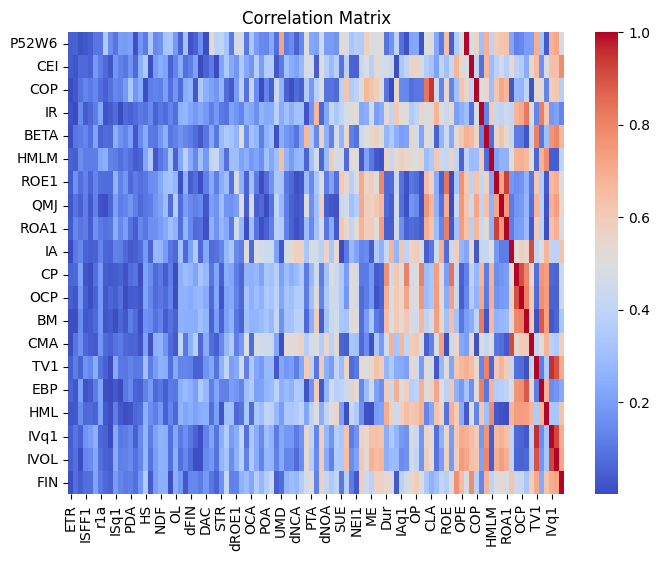

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix =np.abs(dff99[np.array(dff99.columns)[np.argsort(np.linalg.norm((dff99.corr()),axis=0))]].corr())[-20:]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
np.sum(np.abs(corr_matrix),axis=1).sort_values()

ETR          5.154312
LIQ          6.128016
RER          8.145797
SIM1         8.453777
ISFF1        8.572172
Resid111     9.599413
ACI          9.920100
ILR1        10.270337
ETL         10.415037
r1a         10.745013
ISq1        10.933965
OA          10.937432
CIM1        11.141193
PDA         12.024355
dWC         12.655801
Abr1        12.809260
dROA1       13.483340
DAC         13.710853
OL          14.154633
dFNL        14.445500
HS          14.731356
dFIN        14.839079
PEAD        15.205542
NDF         15.232537
STR         15.245538
IM1         15.336148
IOCA        15.354295
NOA         15.360335
IVC         15.523387
ILE1        15.693559
CTO         16.250170
IG          16.467253
dLNO        16.601722
dROE1       16.772358
BAB         16.801647
IMD         16.843503
dNCA        17.828345
dNCO        18.275863
OCA         18.898357
GPA         18.908199
dPIA        18.956801
dII         19.040390
UMD         19.177185
IVG         19.430203
TA          19.519629
POA       

In [51]:
Y= np.array(fama285)
X = np.array(dff96)
print(np.sum(np.linalg.inv(X.T @ X) @ X.T @ Y, axis=1))

[ 1.16544154e+00  7.96222846e-02 -7.94041986e+00  1.06727938e+00
 -4.19788926e+00  1.55550413e+00 -2.06556846e+00 -5.93910441e+00
 -1.93253973e+00  4.37504478e+00  1.56339765e+00 -8.40971678e-01
  1.33284596e+00 -6.07455621e+00  7.76977750e+00  6.88715768e-01
 -7.63275832e+00  4.09362340e+00  1.44992453e+00  1.50450240e+00
  2.59057860e+00  3.38017581e+00  4.52830348e-01  1.81426833e+00
 -1.04323096e+00  1.15123222e+00  2.15118303e+00  2.82214482e+00
 -5.46099614e+00 -4.16495277e+00  3.28409001e+00  4.89331318e+00
 -3.45690354e+00  1.72729681e+00 -1.16867014e+00 -1.55535045e+00
  8.32821901e-01 -2.49302390e+00  4.43453765e+00 -9.37302887e-01
  2.92995777e+00 -4.93260254e+00 -4.63081579e+00 -4.60641791e-01
  7.87986603e+00  4.77026672e-01 -4.98947339e+00  5.47678501e+00
 -5.12029967e+00 -2.17638972e-01 -4.82312233e+00  3.38999742e+00
 -1.69207165e+00  2.14318509e+00  3.85674329e+00 -2.52075954e+00
  6.90458187e+00 -1.02154146e+01 -7.92364383e+00 -2.81247291e-01
  7.83453001e+00 -6.40675

In [53]:
sumbeta = np.linalg.norm(np.linalg.inv(X.T @ X) @ X.T @ Y, axis=1)

dataframe=pd.DataFrame({'Column1': df96.columns[1:], 'Column2': sumbeta })
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(dataframe.sort_values('Column2'))

     Column1    Column2
69      SIM1   0.315120
62       r1a   0.319499
5       CIM1   0.323672
36      ILR1   0.352817
37       IM1   0.366161
35      ILE1   0.400374
63       RER   0.476191
83       LIQ   0.498960
64  Resid111   0.528254
1        ACI   0.542522
91       IMD   0.545813
39        IR   0.583246
22     dROA1   0.586019
0       Abr1   0.592014
68      SGq1   0.595432
15       dII   0.596290
54     OLEq1   0.617125
38      IOCA   0.626779
20        DP   0.633452
29      EPRD   0.653833
43       IVG   0.663898
59       PDA   0.665410
30       ETL   0.668857
67       RS1   0.678578
51       OCA   0.679476
34        IG   0.695774
33        HS   0.699214
23     dROE1   0.709368
4        CEI   0.715259
88       SUE   0.722035
55        OP   0.722589
40     ISFF1   0.723839
61       PTA   0.728040
10       DAC   0.730415
31       ETR   0.730819
21      dPIA   0.742913
42       IVC   0.743444
11       dBE   0.748181
49       NOP   0.750392
71        TA   0.759930
8         CP   0

In [27]:

chosen_set = []
# print(df['Unnamed: 0'][year_i*12])

# dfff = dff22[:36*12]
dfff = dff96
Z = np.float64(dfff)
n, p = Z.shape
# SVD Z and define the knum principal components

# Define the optimization variable Gamma
Gamma = cp.Variable((p, p))
# Define the objective function
#####################################################################################
# objective = cp.Minimize(cp.norm(U - Z @ Gamma, 'fro')**2)
# objective = cp.Minimize(cp.norm(Z - Z @ Gamma, 'fro')**2)
objective = cp.Minimize(cp.norm(np.ones((1,n))@Z - np.ones((1,n))@Z @ Gamma, 'fro')**2)
                        
                        
# Define the constraint
constraints = [
    cp.sum(cp.norm(Gamma, 2, axis=1))<= 10
]
# Define the optimization problem
problem = cp.Problem(objective, constraints)
# Solve the optimization problem
result = problem.solve()
# Return the optimal value and the optimal Gamma


In [2]:
df9696 = pd.read_csv('/home/guonaixin/trylab/X_full_96.csv')
dff9696 = np.array(df9696[df9696.columns[1:]])[:36*12]
weight= pd.read_csv('/home/guonaixin/trylab/weight.csv', header=None)
weight = np.array(weight)
mu = weight.T @ np.mean(dff9696,axis=0)
sig = np.sqrt(weight.T @ np.cov(dff9696.T)  @ weight)
sp = np.sqrt(12)* mu / sig
print(sp)

[[1.92406373]]


sr_best 0.25313651585327346
[ 0  6 11 12 16 18]
[2.74290137e-10 1.00414447e+00 1.31970325e+00 1.46929044e+00
 1.40850265e+00 4.33415145e-10 7.69542119e-11 1.00390045e-10
 3.90839572e-10 1.86641981e-01 1.91588026e-10 3.18536121e-01
 1.61565455e-10 1.30948785e+00 5.67204222e-11 1.09452740e-09
 8.20205448e-11 4.91254731e-01 2.01128443e-10 4.92438498e-01]
[3, 4, 2, 13, 1] sr 0.027876303309657718


In [140]:
difference = Z - Z_approx
Sigma = np.cov(np.transpose(difference), rowvar=True)  
S,U=np.linalg.eig(Sigma)
np.sqrt(S)

array([1.12196146e+00, 6.79739753e-01, 6.38822052e-01, 6.08555925e-01,
       5.67800879e-01, 5.46259782e-01, 5.12670005e-01, 1.62055249e-01,
       4.85420984e-01, 2.46713419e-01, 2.77332795e-01, 3.01109428e-01,
       3.59902608e-01, 4.41003413e-01, 3.97751507e-01, 4.07157018e-01,
                  nan,            nan, 6.95619510e-09, 7.39113650e-09])

In [154]:
St=np.array([ 0,  6, 11, 12, 16])
# Define the dimensions of the matrices
Z=Z
n, p = Z.shape
mu0 = np.mean(Z, axis=0)
Sigma0 = np.cov(Z.T)
# Define the optimization variable Gamma
# Gamma = cp.Variable((p, p))
Z0 = Z[:,St]
Gamma0 = np.zeros((p, p))
Gamma0[St] = (np.linalg.pinv(Z0.T@Z0)@Z0.T@Z)

Sigma = (Z-Z@Gamma0).T@(Z-Z@Gamma0)/n
# Sigma = np.cov((Z-Z@Gamma0).T)      
S,U=np.linalg.eig(Sigma)
Sigma_inv_half=U@np.diag(np.sqrt(1/S))@U.T

In [3]:
unionset = choose_factor('DGL_new1', Z, knum, train_size=600, svd_C = 1000, asset=[[None]],fix_true = None,fix_false = None,hyper_p = 0.1) 
unionset 

sr_best 0.25313651585327346
sr 0 [16, 11, 12, 6, 0] 0.2159572168501919
sr 1 [16, 17, 7, 3, 1] 0.04745950435239066
sr 2 [15, 13, 8, 17, 14] 0.044644916506591366
sr 3 [17, 10, 5, 1, 8] 0.029636653015905307
sr 4 [19, 17, 7, 2, 15] 0.04131528459678209
sr 5 [19, 13, 17, 8, 10] 0.029233837457708828
sr 6 [10, 5, 8, 17, 13] 0.02740645331374619
sr 7 [5, 8, 10, 17, 1] 0.029636653015905314
sr 8 [17, 5, 10, 18, 1] 0.017575353610692186
sr 9 [13, 5, 17, 10, 1] 0.020264656111595093


[13, 5, 17, 10, 1]